In [3]:
from qiskit import QuantumRegister, ClassicalRegister, Aer, execute, QuantumCircuit
from qiskit.tools.visualization import plot_histogram

In [4]:
import math, random

In [5]:
S_simulator = Aer.get_backend(name='statevector_simulator')
Q_simulator = Aer.get_backend(name='qasm_simulator')

# Consider the function takes a 8 bit input

In [6]:
length = 8

# Circuit design

In [7]:
q = QuantumRegister(length+1)
c = ClassicalRegister(length+1)

# BlackBox logic for $f_{s}(x)$ (not known to the user)

In [11]:
# blackbox function non-constant 
def balanced_blackbox(ckt, q):
    ckt.cx(q[0], q[-1])
    pass

# blackbox function constant 
def constant_blackbox(ckt, q):
    for qi in q:
        ckt.id(qi)

# Main Circuit (We will use a balanced circuit here ;) and won't tell our qubits)

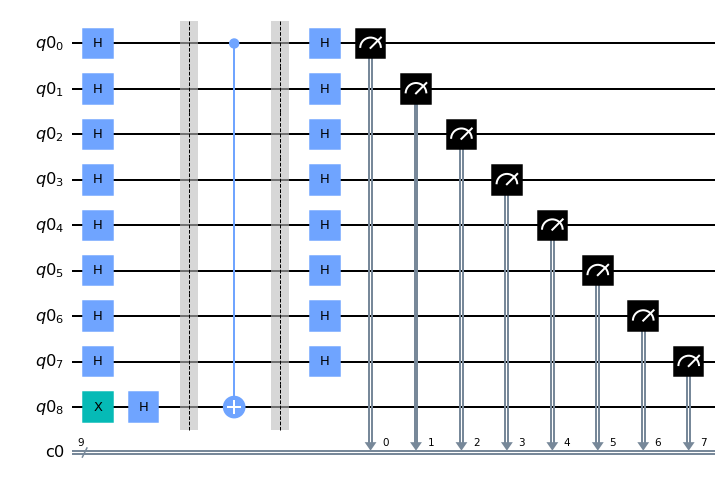

In [9]:
ckt = QuantumCircuit(q,c)

for i in range(length):
    ckt.h(q[i])   
    
ckt.x(q[-1])
ckt.h(q[-1])

ckt.barrier()
balanced_blackbox(ckt, q)
ckt.barrier()

for i in range(length):
    ckt.h(q[i])  
    
ckt.measure(q[:length], c[:length])
    
ckt.draw(output = "mpl")

# Circuit Simulation

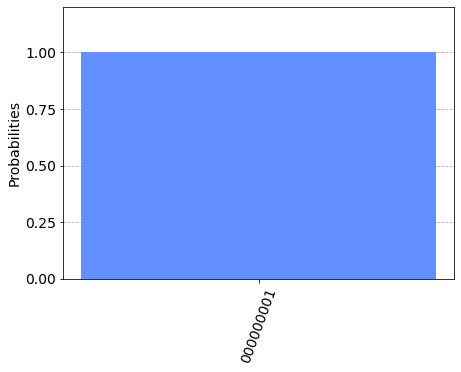

In [30]:
# Execute the circuit
ex = execute(ckt, Q_simulator, shots = 1024)
res = ex.result()
bars = res.get_counts(ckt)

        
# Plot the results
plot_histogram(bars, bar_labels=False)

# Main Circuit (We will now use a constant circuit here ;), lol our qubits will never know, hehe!)

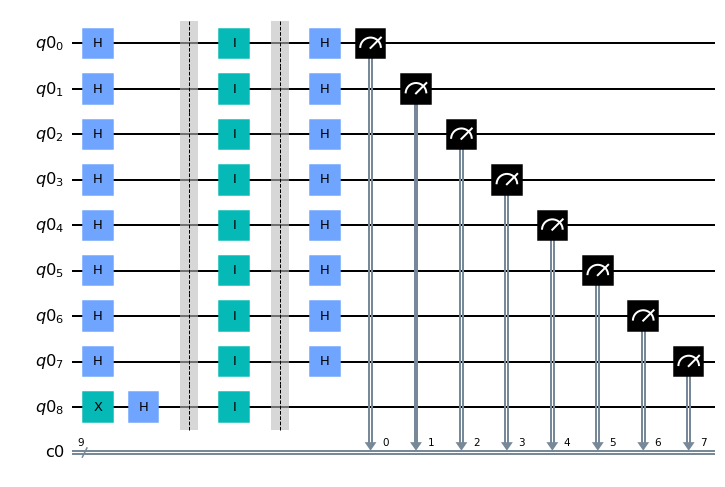

In [12]:
ckt = QuantumCircuit(q,c)

for i in range(length):
    ckt.h(q[i])   
    
ckt.x(q[-1])
ckt.h(q[-1])

ckt.barrier()
constant_blackbox(ckt, q)
ckt.barrier()

for i in range(length):
    ckt.h(q[i])  
    
ckt.measure(q[:length], c[:length])
    
ckt.draw(output = "mpl")

# Circuit Simulation

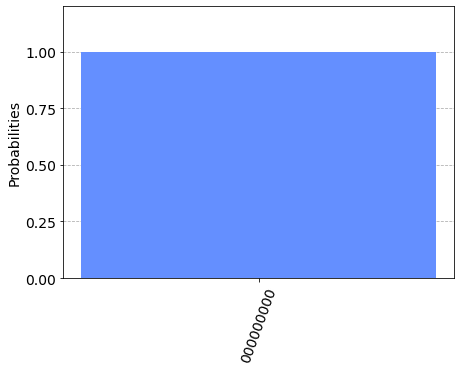

In [13]:
# Execute the circuit
ex = execute(ckt, Q_simulator, shots = 1024)
res = ex.result()
bars = res.get_counts(ckt)

        
# Plot the results
plot_histogram(bars, bar_labels=False)

# Explanation: Wow, I am startled. Our circuit can pinpoint t

# The algorithm was implemented correctly, because the string predicted was correct